In [1]:
#importo il dataset:

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
#inserisco una colonna con l'attributo target nel mio dataframe e lo chiamo data0

data0 = data
data0.insert(0, 'target', target)
#data0

In [3]:
#conto i dati che hanno 1 e quelli che hanno 0
#in base alla descrizione del dataset ora so che quelli a 1 sono benigni e quelli a 0 sono maligni

target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [4]:
#importo le librerie necessarie per fare il parallel plot

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [5]:
#PROVE CON ALTRI PLOT
#estraggo dal dataframe un paio di attributi da plottare e li inserisco in due variabili

m_rad = data0['mean radius']
m_area = data0['mean area']

#le variabili mi ritornano di tipo pandas.core.series.Series
#recasto a lista per poterle plottare

m_rad = list(m_rad)
m_area = list(m_area)

In [6]:
#creo una funzione per colorare i dati in base all'attributo target

def pltcolor(classe):
    cols=[]
    for c in classe:
        if c==0:
            cols.append('red')
        else:
            cols.append('green')
    return cols


#creo la lista dei colori con la funzione sopra
cols=pltcolor(list(target))

#data0.plot.scatter('worst area', 'mean area', c=cols, alpha=0.3)
#plt.rc('figure', figsize=(10.0, 10.0))
#plt.grid(True)
#plt.show()

In [7]:
maligno = target[target==0]
benigno = target[target==1]

In [8]:
m_id = list(maligno.index)
b_id = list(benigno.index)

In [9]:
id = list(data0.index)

In [10]:
data_mean = data0.iloc[id, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [11]:
data_worst = data0.iloc[id, [0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]

In [12]:
import seaborn as sns
import pandas as pd


In [13]:
labels = data0.columns

<font size=5> DA QUI IN POI SONO PROVE CON I DATI NORMALIZZATI</font>

In [14]:
from sklearn import preprocessing
colms = data_mean.columns
scaler = preprocessing.MinMaxScaler() #creao uno scaler da applicare al dataset di default scala (0,1)
np_scaled = scaler.fit_transform(data_mean) #adatta ai dati e poi li trasforma (restituisce un array)
mean_norm = pd.DataFrame(np_scaled, columns = colms) #riporto i dati alla forma di dataframe
mean_norm

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,0.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,0.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,0.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


In [15]:
colms = data_worst.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(data_worst)
worst_norm = pd.DataFrame(np_scaled, columns = colms)

In [16]:
pazienti_benigni = data0.loc[data0['target'] == 1]
#pazienti_benigni

In [17]:
pazienti_maligni = data0.loc[data0['target'] == 0]
#pazienti_maligni

In [18]:
pazienti = data0

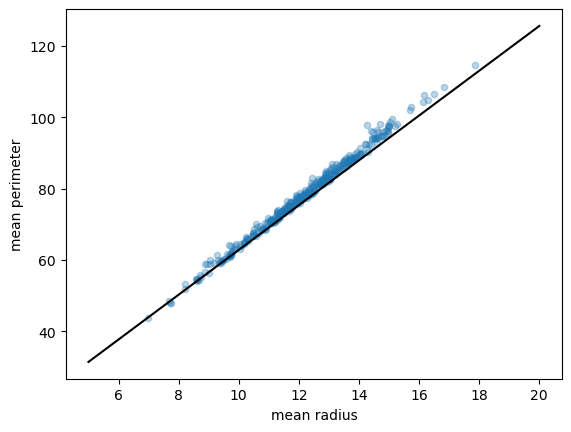

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

#ax = plt.scatter("mean radius", "mean perimeter", data=pazienti_benigni_norm, alpha=0.3)
ax = pazienti_benigni.plot.scatter(x = "mean radius",y="mean perimeter", alpha=.3)
ax.plot([5, 10, 20], [31.4, 62.8, 125.6], color="black")

plt.show()

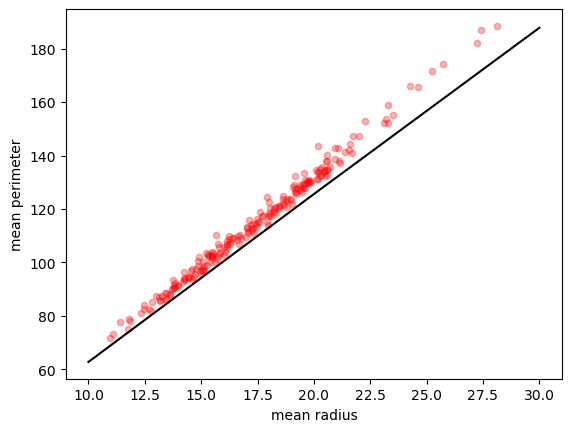

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

#ax = plt.scatter("mean radius", "mean perimeter", data=pazienti_benigni_norm, alpha=0.3)
ax = pazienti_maligni.plot.scatter(x = "mean radius",y="mean perimeter", color="red", alpha=.3)
ax.plot([10, 20, 30], [62.8, 125.6, 187.8], color="black")

plt.show()

# Usiamo seaborn per la regressione lineare

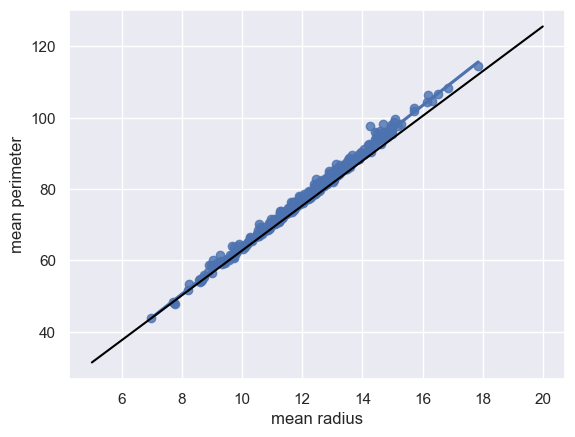

In [34]:
import seaborn as sb
  
# load data
  
# use regplot
ax = sb.regplot(x = "mean radius",
            y = "mean perimeter",
            robust=True, # elimina gli outliers
            ci = None,
            data = pazienti_benigni)
ax.plot([5, 10, 20], [31.4, 62.8, 125.6], color="black")



# Vediamo tutti i pazienti assieme

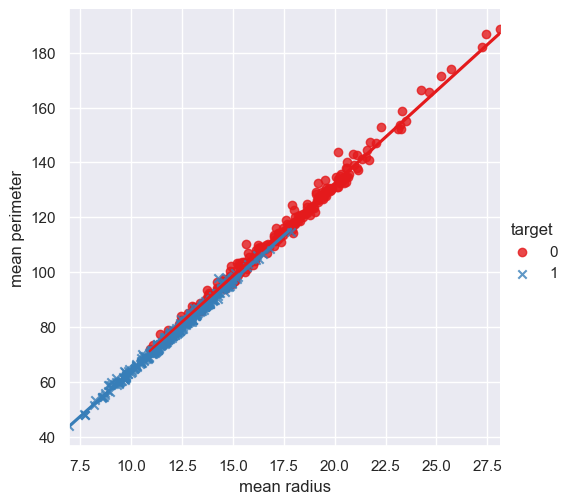

In [37]:
import seaborn as sb
  
# load data
  
# use regplot
ax = sb.lmplot(x = "mean radius",
            y = "mean perimeter",
            robust=True, # elimina gli outliers
            hue="target",
            ci = None,
            markers=["o", "x"], palette="Set1",
            data = pazienti)




In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
c
sns.lmplot(x="mean radius", y="mean perimeter", hue="target", data=pazienti,
           palette="Set1");


NameError: name 'c' is not defined

In [ ]:
import seaborn as sb
sns.set_theme(color_codes=True)

  
# load data
  
# use regplot
ax = sns.lmplot(x = "mean radius",
            y = "mean perimeter",
            robust=True, # elimina gli outliers
            col="target",
            ci = None,
            data = pazienti)


# Search in the same range

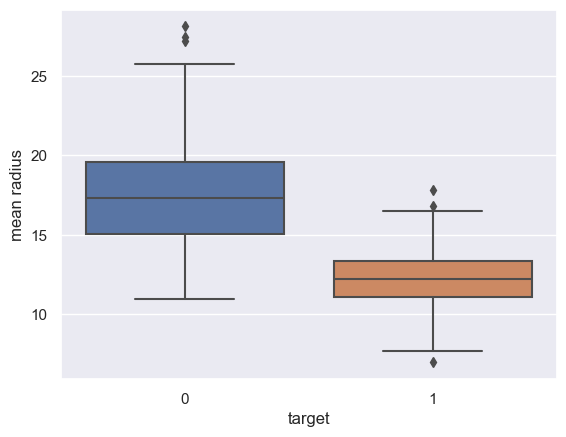

In [29]:
ax = sns.boxplot(x= "target",y="mean radius", data=pazienti)
# show plot
plt.show()


In [30]:
np.percentile(pazienti["mean radius"], 25)

11.7

In [31]:
np.percentile(pazienti["mean radius"], 75)

15.78

In [32]:
select1 = pazienti[pazienti["mean radius"]<np.percentile(pazienti["mean radius"], 75)]
select2 = select1[select1["mean radius"]>np.percentile(pazienti["mean radius"], 25)]

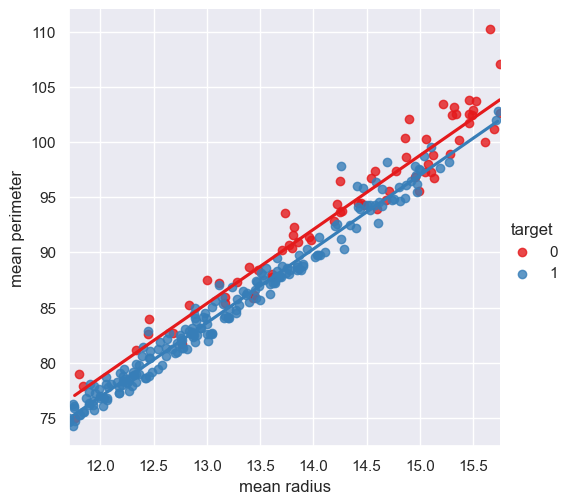

In [33]:
import seaborn as sb
  
# load data
  
# use regplot
ax = sb.lmplot(x = "mean radius",
            y = "mean perimeter",
            robust=True, # elimina gli outliers
            hue="target",
            ci = None,
            palette="Set1",
            data = select2)


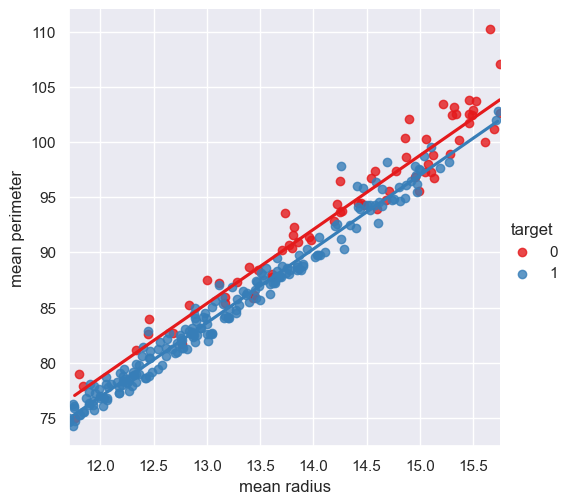

In [33]:
import seaborn as sb
  
# load data
  
# use regplot
ax = sb.lmplot(x = "mean radius",
            y = "mean perimeter",
            robust=True, # elimina gli outliers
            hue="target",
            ci = None,
            palette="Set1",
            data = select2)


In [38]:
paziente_benigno_medio_dataframe=pd.DataFrame(columns = labels)
paziente_benigno_medio_lista =[]
for i in labels:
    att=list(pazienti_benigni[i])
    paziente_benigno_medio_lista.append((sum(att)/len(att)))

paziente_benigno_medio_serie= pd.Series(data=paziente_benigno_medio_lista, index=labels)

paziente_benigno_medio_dataframe = paziente_benigno_medio_dataframe.append(paziente_benigno_medio_serie, ignore_index=True)